In [55]:
import pandas as pd
import matplotlib.pyplot as plt

f = open("/Users/willflojo/Desktop/Mid-term Project/numbers.txt")
data = f.read()

data2 = data.replace('\n', ',').split(",")
for x in data2:
    x = int(x)
num = {}

for item in data2:
    if (item in num):
        num[item] += 1
    else:
        num[item] = 1
for key, value in sorted(num.items(),key=lambda x:int(x[0])):
    print(key, " : ", value)
print("Explaination:", end=" ")
for key, value in sorted(num.items(),key=lambda x:int(x[0])):
    print(key, "occurs", value, "times,", end=" ")


0  :  9
1  :  14
2  :  19
3  :  20
4  :  22
5  :  10
6  :  26
7  :  17
8  :  13
9  :  24
10  :  14
Explaination: 0 occurs 9 times, 1 occurs 14 times, 2 occurs 19 times, 3 occurs 20 times, 4 occurs 22 times, 5 occurs 10 times, 6 occurs 26 times, 7 occurs 17 times, 8 occurs 13 times, 9 occurs 24 times, 10 occurs 14 times, 

Total amount spent: $1777.73
Total number of orders: 59
Per-Order Statistics:
 Average Order Cost: $30.13
 Median: $15.95
 Max: $210.99
 Min: $1.04

Total number of orders in April: 11
Total amount spent in April: $399.17
Total number of orders in May: 19
Total amount spent in May: $294.08
Total number of orders in June: 7
Total amount spent in June: $130.35
Total number of orders in July: 26
Total amount spent in July: $954.13


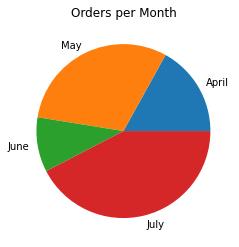

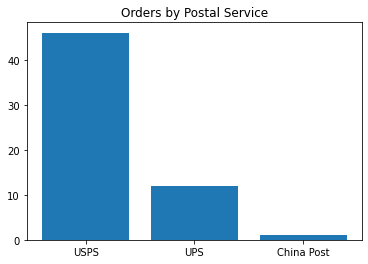

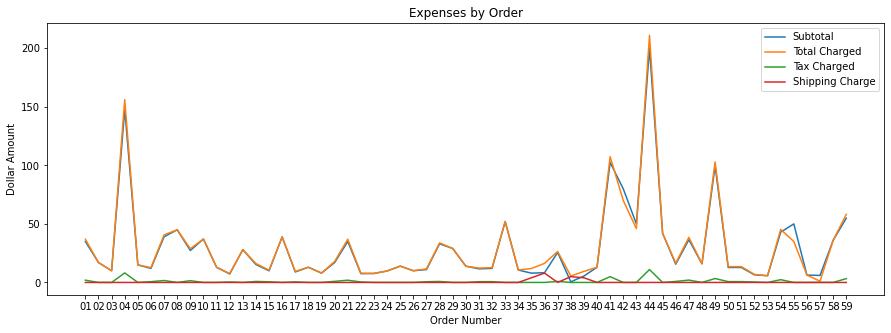

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/willflojo/Desktop/Mid-term Project/amazon-orders.csv')

df['Total Charged'] = df['Total Charged'].str.slice(1)
df['TotalCharged'] = df['Total Charged'].astype('float')
df['Subtotal'] = df['Subtotal'].str.slice(1).astype('float')
df['TaxCharged'] = df['Tax Charged'].str.slice(1).astype('float')
df['ShippingCharge'] = df['Shipping Charge'].str.slice(1).astype('float')
df['OrderID'] = df['Order ID'].str.slice(17)
total_charged = df['TotalCharged'].sum()

print("Total amount spent: ${:.2f}".format(total_charged))
print("Total number of orders:", len(df.index))
print("Per-Order Statistics:\n Average Order Cost: ${:.2f}\n Median: ${:.2f}\n Max: ${:.2f}\n Min: ${:.2f}\n".format(df['TotalCharged'].mean(),df['TotalCharged'].median(),df['TotalCharged'].max(),df['TotalCharged'].min()))

df_04 = df.loc[df['Order Date'].str.startswith('04')]
df_05 = df.loc[df['Order Date'].str.startswith('05')]
df_06 = df.loc[df['Order Date'].str.startswith('06')]
df_07 = df.loc[df['Order Date'].str.startswith('07')]

df_08 = df.loc[df['Carrier Name & Tracking Number'].str.startswith('USPS')]
df_09 = df.loc[df['Carrier Name & Tracking Number'].str.startswith('UPS')]
df_10 = df.loc[df['Carrier Name & Tracking Number'].str.startswith('China')]

print("Total number of orders in April:", len(df_04.index)+1)
print("Total amount spent in April: ${:.2f}".format(df_04['TotalCharged'].sum()))

print("Total number of orders in May:", len(df_05.index)+1)
print("Total amount spent in May: ${:.2f}".format(df_05['TotalCharged'].sum()))

print("Total number of orders in June:", len(df_06.index)+1)
print("Total amount spent in June: ${:.2f}".format(df_06['TotalCharged'].sum()))

print("Total number of orders in July:", len(df_07.index)+1)
print("Total amount spent in July: ${:.2f}".format(df_07['TotalCharged'].sum()))

piechart = np.array([len(df_04.index),len(df_05.index),len(df_06.index),len(df_07.index)])
pielables = ["April","May","June","July"]
plt.pie(piechart, labels = pielables)
plt.title('Orders per Month')
plt.show()


barchart = np.array([len(df_08),len(df_09),len(df_10)])
barlabels = np.array(["USPS","UPS","China Post"])
plt.bar(barlabels, barchart)
plt.title('Orders by Postal Service')
plt.show()


plt.figure(figsize=(15,5))
plt.plot(df.OrderID, df.Subtotal, label = 'Subtotal')
plt.plot(df.OrderID, df.TotalCharged, label = 'Total Charged')
plt.plot(df.OrderID, df.TaxCharged, label = 'Tax Charged')
plt.plot(df.OrderID, df.ShippingCharge, label = 'Shipping Charge')
plt.title('Expenses by Order')
plt.xlabel('Order Number')
plt.ylabel('Dollar Amount')
plt.legend()
plt.show()

